<a href="https://colab.research.google.com/github/Ekesh703/Ekesh703.github.io/blob/master/cancer_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import re
# from google.colab import files
# uploaded_2 = files.upload()
# uploaded_1 = files.upload()
# import io
# trn_variants = pd.read_csv(io.BytesIO(uploaded_2['training_variants']))
# trn_text = pd.read_csv(io.BytesIO(uploaded_1['training_text']), sep = "\|\|", engine="python",names=["ID, TEXT"] , skiprows=1)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trn_variants = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_variants')
trn_text = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_text', sep = "\|\|", engine="python",names=["ID","TEXT"] , skiprows=1)
print(trn_text.iloc[0,1])
print(trn_variants.head())
print(trn_text.size)
print(trn_text.head())

Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
def text_preprocess(text_data, row_no):
  if type(text_data) is not int:
    temp_string = ""
    text_data = re.sub('[^a-zA-Z0-9\n]', ' ', str(text_data))
    text_data = re.sub('\s+', ' ', str(text_data))
    text_data = text_data.lower()

    for word in text_data.split():
      if not word in stop_words:
        temp_string += word + " "
    trn_text.iloc[row_no, 1] = temp_string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for index, row in trn_text.iterrows():
  text_preprocess(row['TEXT'],index)

trn_text.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
final_result = pd.merge(trn_variants, trn_text)
print(final_result[final_result.isnull().any(axis = 1)])
final_result.loc[final_result['TEXT'].isnull(), 'TEXT'] = final_result['Gene'] +' '+final_result['Variation']
print(final_result.iloc[0])

Empty DataFrame
Columns: [ID, Gene, Variation, Class, TEXT]
Index: []
ID                                                           0
Gene                                                    FAM58A
Variation                                 Truncating Mutations
Class                                                        1
TEXT         cyclin dependent kinases cdks regulate variety...
Name: 0, dtype: object


Training Data
         ID    Gene  ... Class                                               TEXT
886    886  PDGFRA  ...     3  activating mutations platelet derived growth f...
1809  1809    RHOA  ...     2  rho family small gtpases serve molecular switc...
2617  2617   BRCA1  ...     4  abstract germline mutations inactivate tumor s...
2768  2768    BRAF  ...     7  30 mutations b raf gene associated human cance...
1180  1180  PIK3CA  ...     5  fifteen rare cancer derived mutants pik3ca gen...

[5 rows x 5 columns]
train_class_dist
 1    319
2    254
3     50
4    385
5    136
6    155
7    536
8     11
9     21
Name: Class, dtype: int64 
CV_class_dist
 1    107
2     85
3     17
4    129
5     45
6     51
7    179
8      3
9      7
Name: Class, dtype: int64 
test_class_dist
 1    142
2    113
3     22
4    172
5     61
6     69
7    238
8      5
9      9
Name: Class, dtype: int64


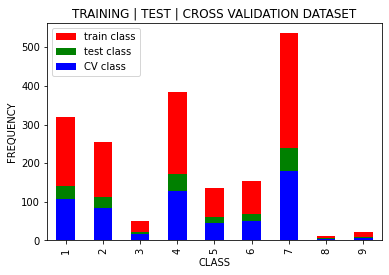

In [ ]:
final_result.Gene =final_result.Gene.str.replace('\s+', '_')
final_result.Variation = final_result.Variation.str.replace('\s+', '_')

#train_test_split

Y = final_result['Class'].values

from sklearn.model_selection import train_test_split

### way_one gives nd arrays
# X = final_result.iloc[:,[1,2,4]].values
# X_train_main, X_test, y_train_main, y_test = train_test_split(X, Y, test_size=0.25, random_state=43)
# X_train, X_CV, y_train, y_CV = train_test_split(X_train_main, y_train_main, test_size=0.25, random_state=43)
# unique_elements, counts_elements = np.unique(y_train, return_counts=True)
# print(np.asarray((unique_elements, counts_elements)))

### way_two gives series and nd array
X_train_main, X_test, y_train_main, y_test = train_test_split(final_result, Y, stratify=Y, test_size=0.25, random_state=43)
X_train, X_CV, y_train, y_CV = train_test_split(X_train_main, y_train_main, stratify=y_train_main, test_size=0.25, random_state=43)

print('Training Data\n',X_train.head())
train_class_dist = X_train['Class'].value_counts().sort_index()
CV_class_dist = X_CV['Class'].value_counts().sort_index()
test_class_dist = X_test['Class'].value_counts().sort_index()
print('train_class_dist\n',train_class_dist,'\nCV_class_dist\n',CV_class_dist,'\ntest_class_dist\n',test_class_dist)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_dist.plot(kind='bar', color='red', label='train class')
test_class_dist.plot(kind='bar', color='green', label='test class')
CV_class_dist.plot(kind='bar', color='blue', label='CV class')
plt.xlabel('CLASS')
plt.ylabel('FREQUENCY')
plt.legend()
plt.title('TRAINING | TEST | CROSS VALIDATION DATASET')
plt.show()



In [ ]:
from sklearn.metrics import log_loss
test_data_len = y_test.shape[0]
test_pred_class = np.zeros((test_data_len, 9))
CV_data_len = X_CV.shape[0]
CV_pred_class = np.zeros((CV_data_len, 9))
print('PRED_CLASS',CV_pred_class)
for i in range(CV_data_len):
  rand_prob_array= np.random.rand(1,9)
  CV_pred_class[i]=((rand_prob_array/sum(sum(rand_prob_array)))[0])
print('Log Loss on CV data using Random Prob Model', log_loss(y_CV,CV_pred_class, eps=1e-15 ))

for i in range(test_data_len):
  rand_prob_array= np.random.rand(1,9)
  test_pred_class[i]=((rand_prob_array/sum(sum(rand_prob_array)))[0])
print('Log Loss on test data using Random Prob Model', log_loss(y_test,test_pred_class, eps=1e-15 ))

PRED_CLASS [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Log Loss on CV data using Random Prob Model 2.5117975617277364
Log Loss on test data using Random Prob Model 2.498599743640422


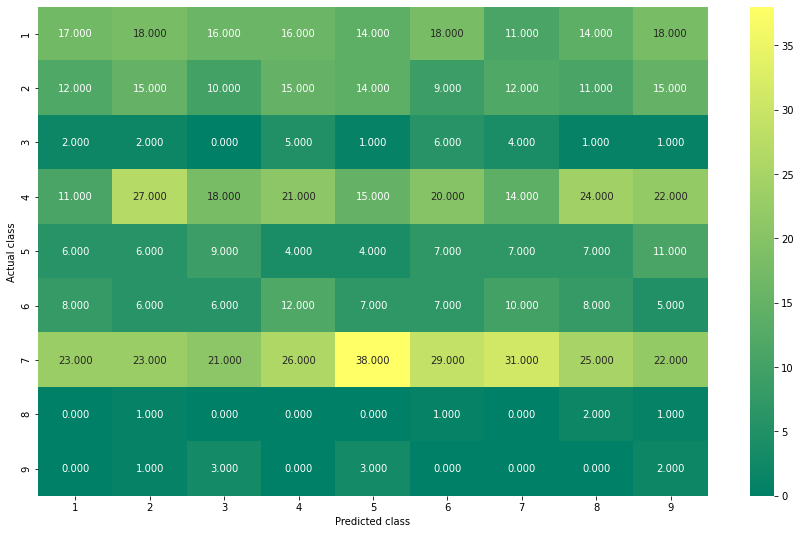

In [ ]:
from sklearn.metrics import confusion_matrix
pred_y = np.argmax(test_pred_class, axis=1)
pred_y = pred_y + 1
C=confusion_matrix(y_test, pred_y)

import seaborn as sns
labels = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(15, 9))
sns.heatmap(C,annot=True, cmap='summer', fmt='.3f',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

Evaluation of 'Gene' feature

221
BRCA1    140
TP53      86
BRCA2     83
EGFR      82
PTEN      72
Name: Gene, dtype: int64


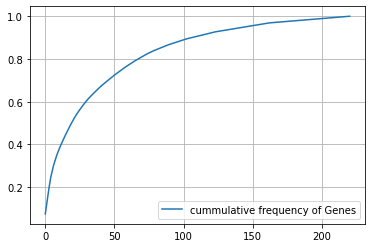

In [ ]:
#feature evaluation (gene)
unique_genes = X_train['Gene'].value_counts()
print(unique_genes.shape[0])
print(unique_genes.head())
s = sum(unique_genes.values)
h = unique_genes.values/s
c = np.cumsum(h)
plt.plot(c, label='cummulative frequency of Genes')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#encoding categorical feature
from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()

X_train_gene_encoding = gene_vectorizer.fit_transform(X_train['Gene'])
X_test_gene_encoding =  gene_vectorizer.fit_transform(X_test['Gene'])
X_CV_gene_encoding =    gene_vectorizer.fit_transform(X_CV['Gene'])

print(X_test_gene_encoding)
n_col = np.zeros((X_test_gene_encoding.shape[0],X_train_gene_encoding.shape[1]-X_test_gene_encoding.shape[1]))
print(n_col.shape)

  (0, 84)	1
  (1, 58)	1
  (2, 109)	1
  (3, 4)	1
  (4, 44)	1
  (5, 47)	1
  (6, 112)	1
  (7, 156)	1
  (8, 172)	1
  (9, 55)	1
  (10, 62)	1
  (11, 55)	1
  (12, 44)	1
  (13, 16)	1
  (14, 47)	1
  (15, 44)	1
  (16, 84)	1
  (17, 19)	1
  (18, 52)	1
  (19, 36)	1
  (20, 146)	1
  (21, 18)	1
  (22, 150)	1
  (23, 154)	1
  (24, 153)	1
  :	:
  (806, 90)	1
  (807, 158)	1
  (808, 19)	1
  (809, 174)	1
  (810, 147)	1
  (811, 134)	1
  (812, 44)	1
  (813, 150)	1
  (814, 134)	1
  (815, 65)	1
  (816, 4)	1
  (817, 19)	1
  (818, 19)	1
  (819, 60)	1
  (820, 19)	1
  (821, 51)	1
  (822, 105)	1
  (823, 159)	1
  (824, 98)	1
  (825, 19)	1
  (826, 13)	1
  (827, 156)	1
  (828, 125)	1
  (829, 123)	1
  (830, 61)	1
(831, 41)


(831, 220)
For alpha =  1e-05 The log loss is 2.2978425759856314
For alpha =  0.0001 The log loss is 2.2258853057503116
For alpha =  0.001 The log loss is 2.0117141431976173
For alpha =  0.01 The log loss is 1.912052113410117
For alpha =  0.1 The log loss is 1.885953276833562
For alpha =  1 The log loss is 1.8787241006950879
For best alpha 1 The log loss is 1.8787241006950879


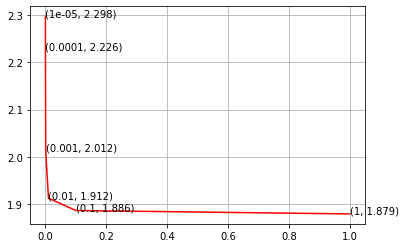

In [ ]:
#significance of gene 
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from scipy.sparse import hstack

alpha = [10 ** x for x in range(-5,1)]
train_logloss = []
n_col = np.zeros((X_test_gene_encoding.shape[0],X_train_gene_encoding.shape[1]-X_test_gene_encoding.shape[1]))
temp_X_test_gene_encoding = hstack((X_test_gene_encoding, n_col))
print(temp_X_test_gene_encoding.shape) 
for i in alpha:
  classifier = SGDClassifier(loss='log', penalty='l2', alpha=i, random_state=44)
  classifier.fit(X_train_gene_encoding, y_train)
  sig_classifier = CalibratedClassifierCV(classifier, method='sigmoid')
  sig_classifier.fit(X_train_gene_encoding, y_train)
  predict_y = sig_classifier.predict_proba(temp_X_test_gene_encoding)
  train_logloss.append(log_loss(y_test, predict_y, labels=classifier.classes_, eps=1e-15))
  print('For alpha = ',i,'The log loss is', log_loss(y_test, predict_y, labels=classifier.classes_, eps=1e-15))

best_alpha = np.argmin(train_logloss)
classifier = SGDClassifier(loss='log', penalty='l2', alpha=alpha[best_alpha], random_state=44)
classifier.fit(X_train_gene_encoding, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method='sigmoid')
sig_classifier.fit(X_train_gene_encoding, y_train)
predict_y = sig_classifier.predict_proba(temp_X_test_gene_encoding)
print('For best alpha', alpha[best_alpha], 'The log loss is',log_loss(y_test, predict_y, labels=classifier.classes_, eps=1e-15) )
#repeat similar for CV log loss

#plotting alpha vs log-loss
fig, ax=plt.subplots()
ax.plot(alpha, train_logloss, c='red')
for i, txt in enumerate(train_logloss):
  ax.annotate((alpha[i], np.round(txt,3)),((alpha[i], np.round(txt,3))))
plt.grid()
plt.show()

In [ ]:
#evaluating overlapping between train and cv and train and test dataset

cv_overlap = X_CV[X_CV['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
test_overlap = X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
print('In CV', cv_overlap,'out of', X_CV.shape[0],'values are found in training set')
print('In test data', test_overlap,'out of', X_test.shape[0],'values are found in training set')

In CV 597 out of 623 values are found in training set
In test data 800 out of 831 values are found in training set


Evaluation of 'Variation' feature

1702
Deletion                48
Truncating_Mutations    48
Amplification           30
Fusions                 23
Q61L                     3
Name: Variation, dtype: int64


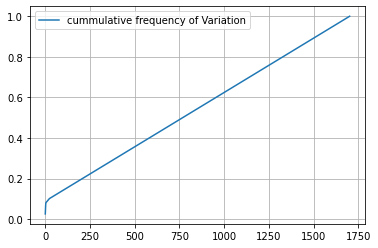

In [ ]:
#feature evaluation (variation)
unique_variation = X_train['Variation'].value_counts()
print(unique_variation.shape[0])
print(unique_variation.head())
s = sum(unique_variation.values)
h = unique_variation.values/s
c = np.cumsum(h)
plt.plot(c, label='cummulative frequency of Variation')
plt.grid()
plt.legend()
plt.show()
#further steps are similar to that of gene (log loss and values overlapping scenarios)
#one_hot_encoding
variation_vectorizer = CountVectorizer()

X_train_variation_encoding = variation_vectorizer.fit_transform(X_train['Variation'])
X_test_variation_encoding =  variation_vectorizer.fit_transform(X_test['Variation'])
X_CV_variation_encoding =    variation_vectorizer.fit_transform(X_CV['Variation'])

Evaluation of 'Text' feature

In [ ]:
#feature evaluation (text)
from collections import defaultdict, Counter

def extract_dictionary(text_class):
  dictionary = defaultdict(int)
  for index, row in text_class.iterrows():
    for word in row['TEXT'].split():
      dictionary[word] +=1
  return dictionary

#respond encoder (incomplete)

In [ ]:
#respond encoder
def respond_encoder(X_train):

  total_dict = extract_dictionary(X_train)
  dict_list =[]
  for i in range(1,10):
    text_class = X_train[X_train['Class']==i]
    dict_list.append(extract_dictionary(text_class))
  dict_list

In [ ]:
#one hot encoder
from sklearn.preprocessing import normalize

text_vectorizer = CountVectorizer(min_df=3)
X_train_text_encoding = text_vectorizer.fit_transform(X_train['TEXT'])
X_train_text_feat = text_vectorizer.get_feature_names()
X_train_text_encoding = normalize(X_train_text_encoding, axis=0)

X_CV_text_encoding = text_vectorizer.fit_transform(X_CV['TEXT'])
X_CV_text_feat = text_vectorizer.get_feature_names()
X_CV_text_encoding = normalize(X_CV_text_encoding, axis=0)

X_test_text_encoding = text_vectorizer.fit_transform(X_test['TEXT'])
X_test_text_feat = text_vectorizer.get_feature_names()
X_test_text_encoding = normalize(X_test_text_encoding, axis=0)

X_train_text_feat_count = X_train_text_encoding.sum(axis=0).A1
X_train_text_dict = dict(zip(list(X_train_text_feat), X_train_text_feat_count))
sorted_text_dict = dict(sorted(X_train_text_dict.items(), key=lambda x:x[1], reverse=True))
sorted_text = np.array(list(sorted_text_dict.values()))
print(Counter(sorted_text))

Counter({1.7320508075688776: 5435, 2.0: 3355, 2.23606797749979: 2750, 2.4494897427831783: 1798, 2.6457513110645907: 1522, 3.1622776601683795: 1489, 2.82842712474619: 980, 3.0: 774, 1.6329931618554523: 538, 3.60555127546399: 488, 3.3166247903554003: 463, 1.7320508075688772: 390, 1.889822365046136: 307, 3.4641016151377557: 295, 4.0: 286, 2.1213203435596424: 275, 1.6666666666666665: 242, 3.8729833462074157: 221, 1.5075567228888183: 219, 4.358898943540673: 195, 3.741657386773941: 190, 4.242640687119286: 188, 6.164414002968979: 176, 2.333333333333333: 173, 4.123105625617661: 165, 6.9282032302755105: 163, 2.5298221281347035: 162, 2.886751345948129: 134, 1.8973665961010275: 115, 1.6059101370939322: 115, 3.0508510792387606: 107, 1.4142135623730951: 107, 5.000000000000001: 106, 4.690415759823428: 105, 1.9414506867883021: 101, 2.713602101199873: 98, 2.5: 89, 2.1105794120443457: 89, 1.7320508075688774: 89, 3.2071349029490923: 85, 2.138089935299395: 82, 2.182820625326997: 80, 1.8898223650461359: 7

**PREPROCESSING BEFORE BUILDING MODEL**

In [ ]:
#combining all features together
from scipy.sparse import hstack

f_X_train = hstack((X_train_gene_encoding, X_train_variation_encoding, X_train_text_encoding)).tocsr()
f_X_CV =    hstack((X_CV_gene_encoding, X_CV_variation_encoding, X_CV_text_encoding)).tocsr()
f_X_test =  hstack((X_test_gene_encoding, X_test_variation_encoding, X_test_text_encoding)).tocsr()
#y_train, y_CV, y_test

In [ ]:
#log_loss function
def get_log_loss(classfier, X_train, y_train, X_test, y_test):
  classifier = SGDClassifier(loss='log', penalty='l2', alpha=alpha[best_alpha], random_state=44)
  classifier.fit(X_train, y_train)
  sig_classifier = CalibratedClassifierCV(classifier, method='sigmoid')
  sig_classifier.fit(X_train, y_train)
  n_col = np.zeros((X_test.shape[0],X_train.shape[1]-X_test.shape[1]))
  temp_X_test = hstack((X_test, n_col))
  predict_y = sig_classifier.predict_proba(temp_X_test)
  return log_loss(y_test, predict_y, labels=classifier.classes_, eps=1e-15)

In [ ]:
#confusion_matrix_plot
def plot_confusion_matrix(y_test, pred_y):
  C=confusion_matrix(y_test, pred_y) #confusion
  A=(((C.T)/(C.sum(axis=1))).T)      #precison
  B=(C.T/C.sum(axis=0))              #recall

  labels = [1,2,3,4,5,6,7,8,9]
  print('<<'*15, 'CONFUSION MATRIX','>>'*15)
  plt.figure(figsize=(15, 9))
  sns.heatmap(C,annot=True, cmap='summer', fmt='.3f',xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted class')
  plt.ylabel('Actual class')
  plt.show()

  print('<<'*15, 'PRECISION MATRIX','>>'*15)
  plt.figure(figsize=(15, 9))
  sns.heatmap(A,annot=True, cmap='summer', fmt='.3f',xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted class')
  plt.ylabel('Actual class')
  plt.show()

  print('<<'*15, 'RECALL MATRIX','>>'*15)
  plt.figure(figsize=(15, 9))
  sns.heatmap(B,annot=True, cmap='summer', fmt='.3f',xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted class')
  plt.ylabel('Actual class')
  plt.show()

**Machine Learning Model (Naive Bayes)**

LOG LOSS for alpha =  1e-05 is 2.035617391170705
LOG LOSS for alpha =  0.0001 is 2.046752954877186
LOG LOSS for alpha =  0.001 is 2.0525043362705855
LOG LOSS for alpha =  0.01 is 1.9069483022679636
LOG LOSS for alpha =  0.1 is 1.934598066661591
LOG LOSS for alpha =  1 is 2.1408239855670237
LOG LOSS for alpha =  10 is 2.3822374704817926
LOG LOSS for alpha =  100 is 2.0304535996954285
LOG LOSS for alpha =  1000 is 2.023646725503374


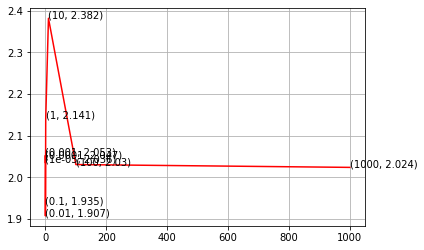

In [ ]:
from sklearn.naive_bayes import MultinomialNB
alpha = [10 ** x for x in range(-5,4)]
n_col = np.zeros((f_X_CV.shape[0],f_X_train.shape[1]-f_X_CV.shape[1]))
temp_X_test = hstack((f_X_CV, n_col))
cv_log_error =[]
for i in alpha:
  clf = MultinomialNB(alpha=i)
  clf.fit(f_X_train, y_train)
  #predict_cv_y_NB = clf.predict(temp_X_test)
  sig_classifier= CalibratedClassifierCV(clf, method='sigmoid')
  sig_classifier.fit(f_X_train, y_train)
  predict_cv_y = sig_classifier.predict_proba(temp_X_test)
  cv_log_error.append(log_loss(y_CV, predict_cv_y, labels=clf.classes_ , eps=1e-15))
  print('LOG LOSS for alpha = ',i,'is',log_loss(y_CV, predict_cv_y, labels=clf.classes_ , eps=1e-15))

#print(predict_cv_y_NB[0], predict_cv_y_cali[0])
fig, ax=plt.subplots()
ax.plot(alpha, cv_log_error, c='red')
for i, txt in enumerate(cv_log_error):
  ax.annotate((alpha[i], np.round(txt,3)),((alpha[i], np.round(txt,3))))
plt.grid()
plt.show()

<<<<<<<<<<<<<<<<<<<----TRAINING SET----->>>>>>>>>>>>>>>>>>>>>>
Training LOG LOSS for best alpha 0.01 is 0.8538084120254487


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< CONFUSION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


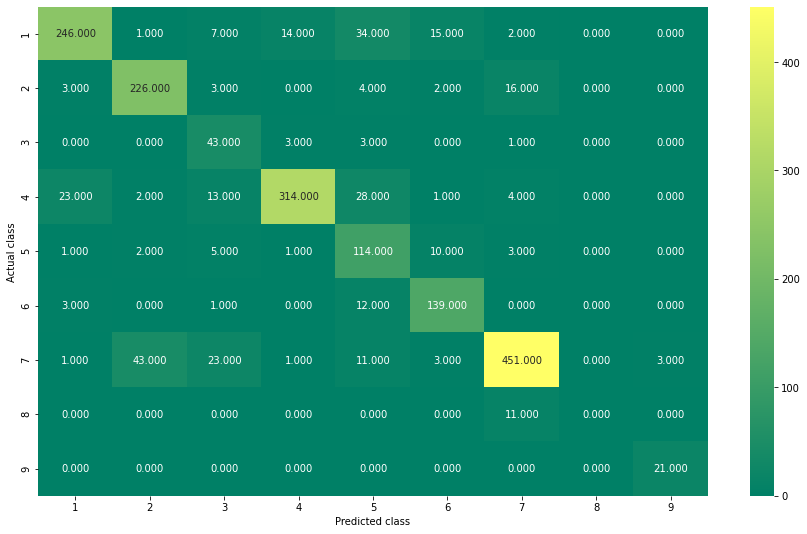

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< PRECISION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


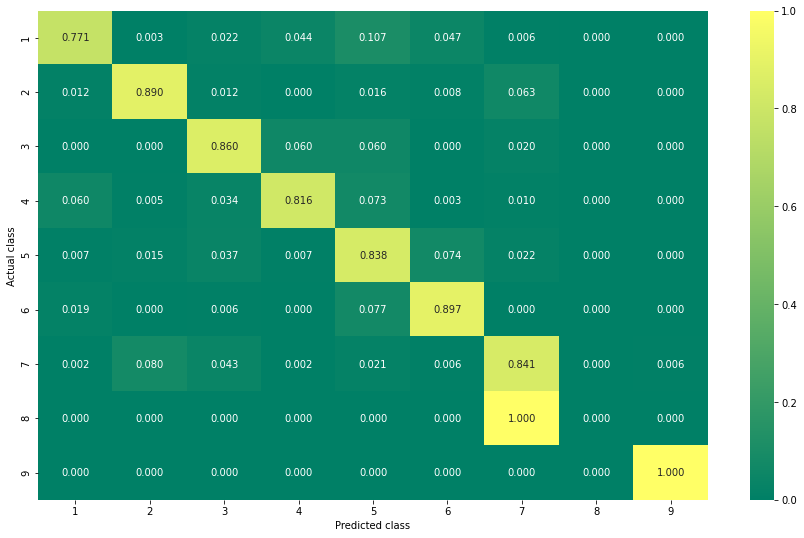

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< RECALL MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


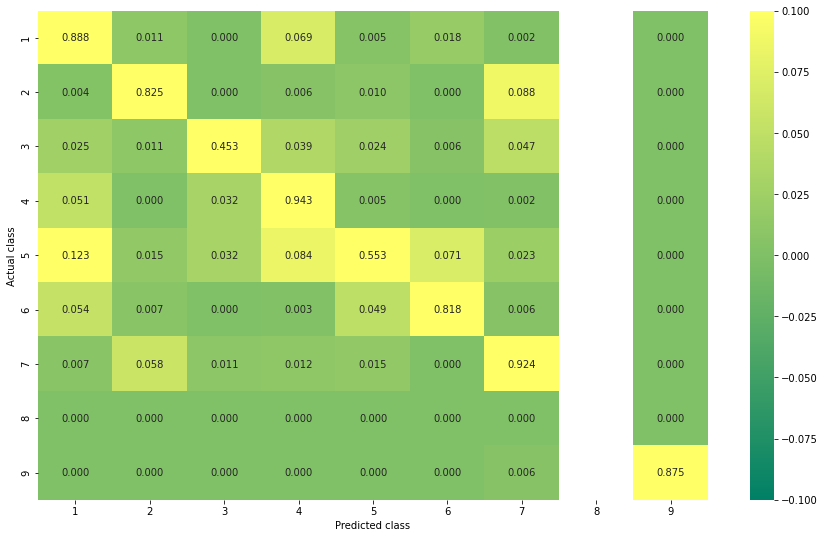

<<<<<<<<<<<<<<<<<<<----CROSS VALIDATION----->>>>>>>>>>>>>>>>>>>>>>
Cross Validation LOG LOSS for best alpha 0.01 is 1.9069483022679636


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< CONFUSION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


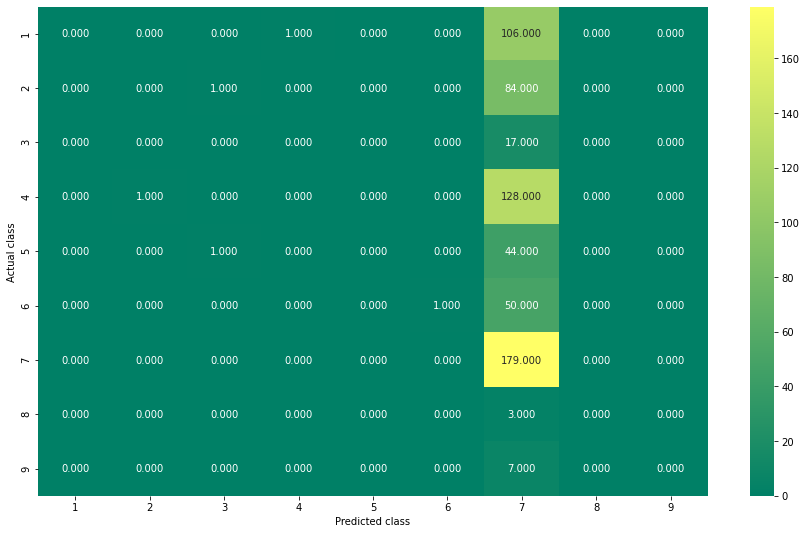

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< PRECISION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


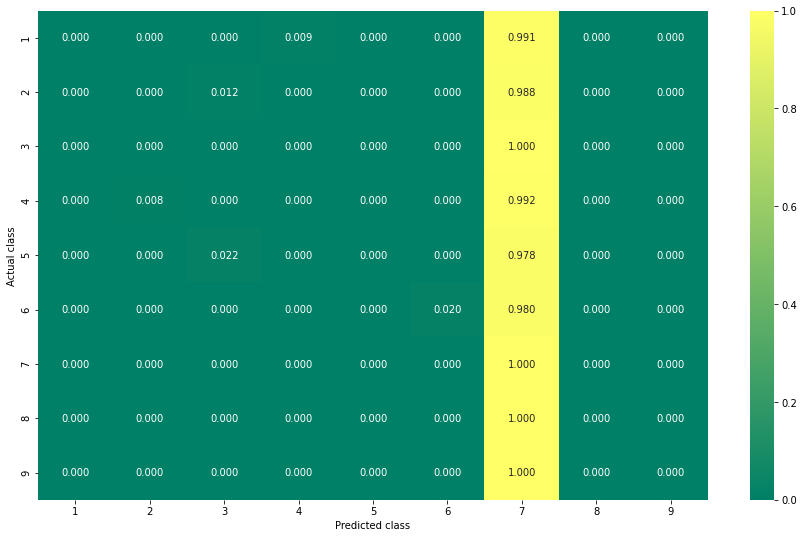

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< RECALL MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


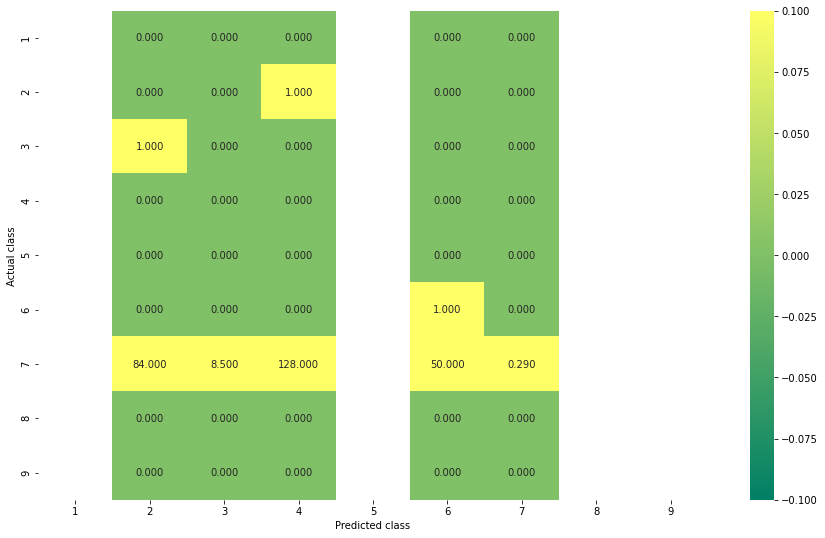

<<<<<<<<<<<<<<<<<<<----TEST SET----->>>>>>>>>>>>>>>>>>>>>>
Test LOG LOSS for best alpha 0.01 is 1.9085030894621167


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< CONFUSION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


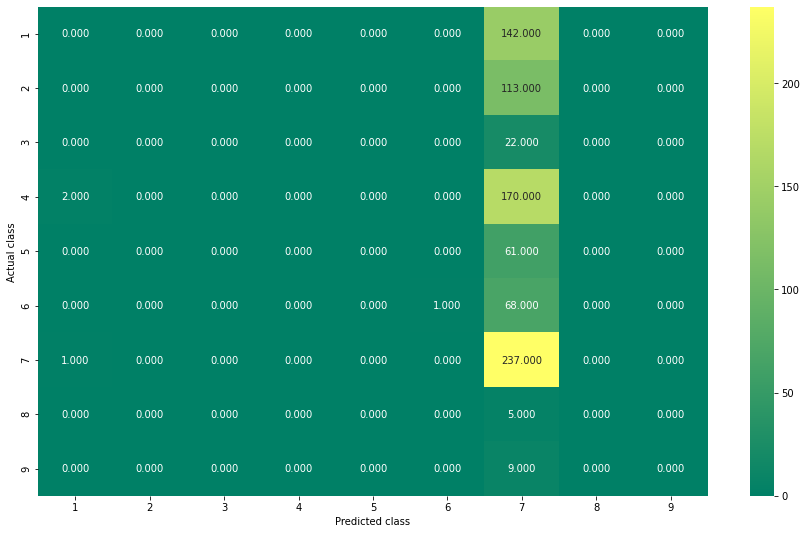

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< PRECISION MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


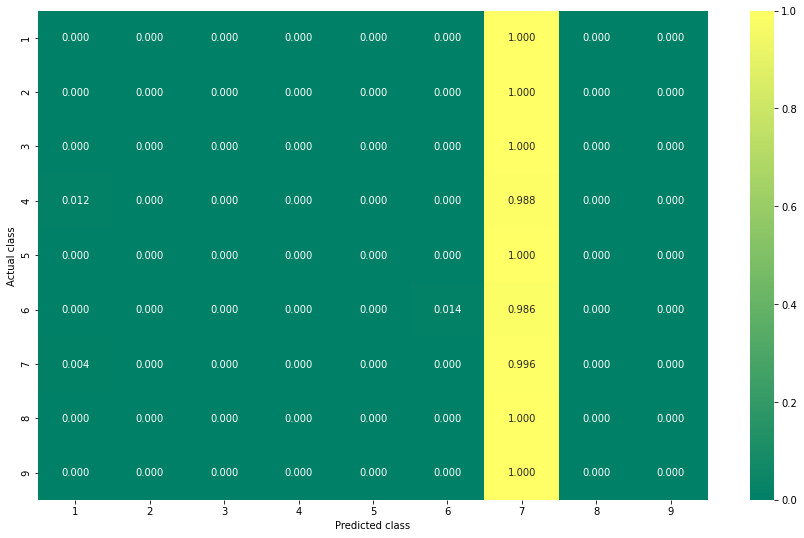

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< RECALL MATRIX >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


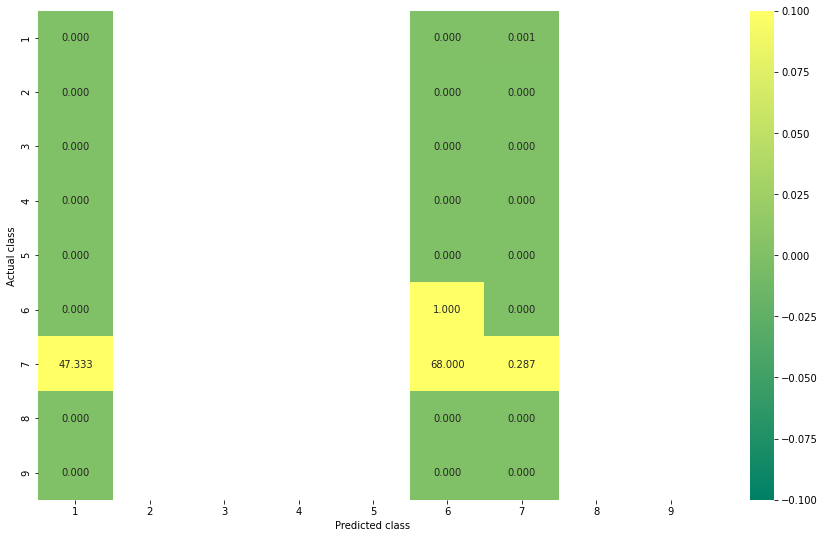

In [ ]:
#best alpha log loss
best_alpha = np.argmin(cv_log_error)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(f_X_train, y_train)
sig_classifier= CalibratedClassifierCV(clf, method='sigmoid')
sig_classifier.fit(f_X_train, y_train)

#for training set
print('<<<<<<<<<<<<<<<<<<<----TRAINING SET----->>>>>>>>>>>>>>>>>>>>>>')
predict_training_y = sig_classifier.predict_proba(f_X_train)
print('Training LOG LOSS for best alpha',alpha[best_alpha], 'is',log_loss(y_train, predict_training_y, labels=clf.classes_ , eps=1e-15))
plot_confusion_matrix(y_train, sig_classifier.predict(f_X_train.toarray()))
#for CV set
print('<<<<<<<<<<<<<<<<<<<----CROSS VALIDATION----->>>>>>>>>>>>>>>>>>>>>>')
n_col = np.zeros((f_X_CV.shape[0],f_X_train.shape[1]-f_X_CV.shape[1]))
temp_X_cv = hstack((f_X_CV, n_col))
predict_cv_y = sig_classifier.predict_proba(temp_X_cv)
print('Cross Validation LOG LOSS for best alpha',alpha[best_alpha], 'is',log_loss(y_CV, predict_cv_y, labels=clf.classes_ , eps=1e-15))
plot_confusion_matrix(y_CV, sig_classifier.predict(temp_X_cv.toarray()))
#for test set
print('<<<<<<<<<<<<<<<<<<<----TEST SET----->>>>>>>>>>>>>>>>>>>>>>')
n_col = np.zeros((f_X_test.shape[0],f_X_train.shape[1]-f_X_test.shape[1]))
temp_X_test = hstack((f_X_test, n_col))
predict_test_y = sig_classifier.predict_proba(temp_X_test)
print('Test LOG LOSS for best alpha',alpha[best_alpha], 'is',log_loss(y_test, predict_test_y, labels=clf.classes_ , eps=1e-15))
plot_confusion_matrix(y_test, sig_classifier.predict(temp_X_test.toarray()))